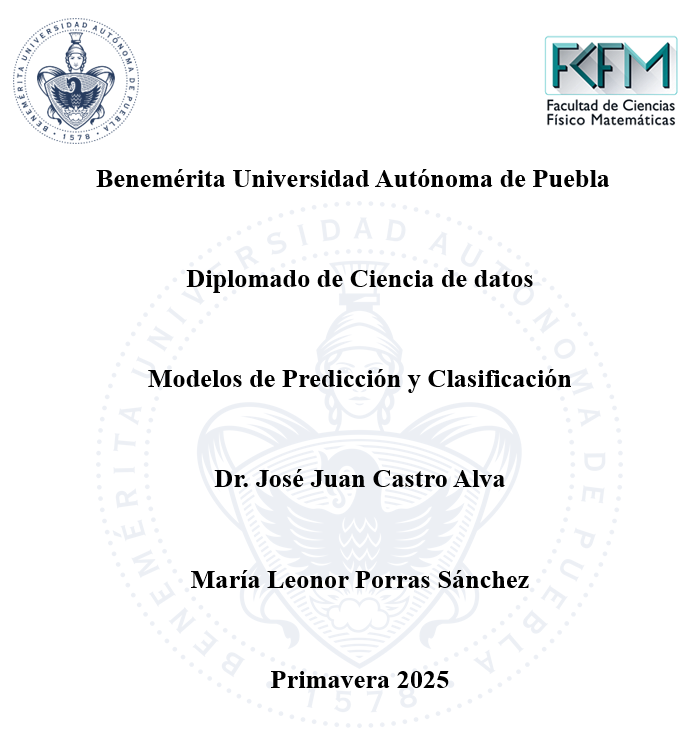


# **2.-Descarga de la Base de Datos: https://www.kaggle.com/datasets/brendaso/2019-coronavirus-dataset-01212020-01262020?classId=76792186-9b8e-4fb9-979c-5f3e7b5ac1af&assignmentId=357c13b5-958e-4aac-96a2-320e17a8de8b&submissionId=4cffec2d-5f44-6277-6be4-51689dbfca91**

# **3.-Análisis exploratorio de la base de datos (EDA). Covid-19 (Enero-Julio 2020)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB
None
                Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  20

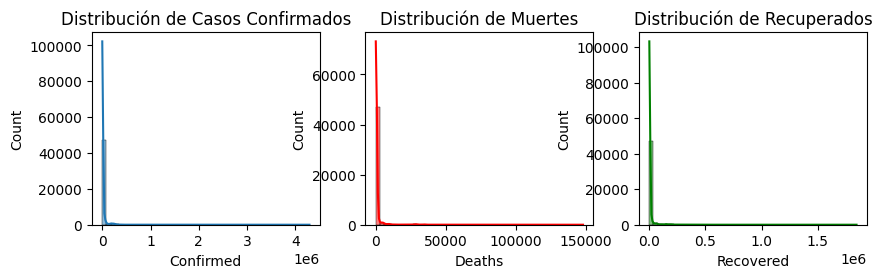

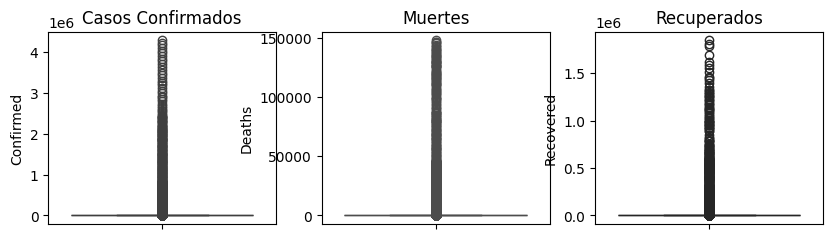

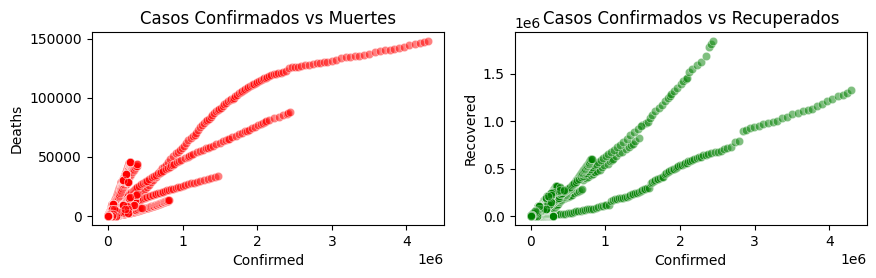

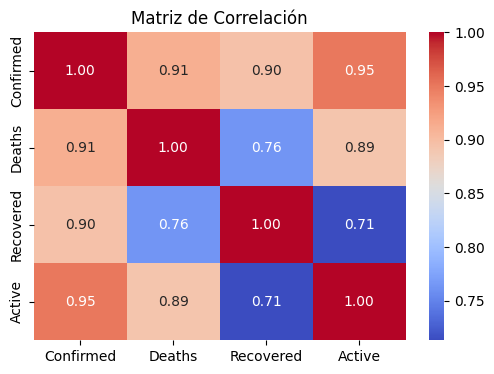

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


df = pd.read_csv("covid_19_clean_complete.csv")

df['Date'] = pd.to_datetime(df['Date'])


print(df.info())
print(df.describe())


fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))
sns.histplot(df['Confirmed'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Casos Confirmados")
sns.histplot(df['Deaths'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title("Distribución de Muertes")
sns.histplot(df['Recovered'], bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribución de Recuperados")
plt.show()

#Bloxplot
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))
sns.boxplot(y=df['Confirmed'], ax=axes[0])
axes[0].set_title("Casos Confirmados")
sns.boxplot(y=df['Deaths'], ax=axes[1], color='red')
axes[1].set_title("Muertes")
sns.boxplot(y=df['Recovered'], ax=axes[2], color='green')
axes[2].set_title("Recuperados")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))
sns.scatterplot(x=df['Confirmed'], y=df['Deaths'], ax=axes[0], alpha=0.5, color='red')
axes[0].set_title("Casos Confirmados vs Muertes")
sns.scatterplot(x=df['Confirmed'], y=df['Recovered'], ax=axes[1], alpha=0.5, color='green')
axes[1].set_title("Casos Confirmados vs Recuperados")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


# **4.-Construcción de modelos**

# **-Regresión Múltiple:**

In [17]:
#predeciremos el número de casos activos.
X = df[['Confirmed', 'Deaths', 'Recovered']]
y = df['Active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE de la Regresión Múltiple:", mean_squared_error(y_test, y_pred))
print("Coeficientes de la Regresión Múltiple:", model.coef_)
print("Intercepto de la Regresión Múltiple:", model.intercept_)

MSE de la Regresión Múltiple: 1.5295351874271754e-20
Coeficientes de la Regresión Múltiple: [ 1. -1. -1.]
Intercepto de la Regresión Múltiple: -1.4551915228366852e-11


# **-Regresión Logística**

In [33]:
#clasificaremos si hay mas de 1000 casos activos

df['High_Cases'] = (df['Active'] > 1000).astype(int)
X_class = df[['Confirmed', 'Deaths', 'Recovered']]
y_class = df['High_Cases']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy de Regresión Logística:", accuracy_score(y_test, y_pred))
print("Coeficientes de la Regresión Logística:", log_reg.coef_)
print("Intercepto de la Regresión Logística:", log_reg.intercept_)
print(classification_report(y_test, y_pred))



Accuracy de Regresión Logística: 1.0
Coeficientes de la Regresión Logística: [[ 1.55070131 -1.5496387  -1.55078203]]
Intercepto de la Regresión Logística: [-1551.35814286]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7743
           1       1.00      1.00      1.00      2071

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



# **-Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrático (QDA):**

In [32]:
#(LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("Accuracy de LDA:", accuracy_score(y_test, y_pred_lda))
print("Coeficientes de LDA:", lda.coef_)
print(classification_report(y_test, y_pred_lda))


Accuracy de LDA: 0.8095577746077033
Coeficientes de LDA: [[-5.61526039e-06  1.29078200e-04  1.27382237e-05]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      7743
           1       1.00      0.10      0.18      2071

    accuracy                           0.81      9814
   macro avg       0.90      0.55      0.54      9814
weighted avg       0.85      0.81      0.74      9814



In [ ]:
#(QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

print("Accuracy de QDA:", accuracy_score(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))

Accuracy de QDA: 0.977481149378439
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7743
           1       0.94      0.95      0.95      2071

    accuracy                           0.98      9814
   macro avg       0.96      0.97      0.97      9814
weighted avg       0.98      0.98      0.98      9814



# **5.-Interpretación de los Modelos**

1.Regresión Múltiple
MSE (Error Cuadrático Medio):

**1.53×10^−20**

El valor de MSE es extremadamente pequeño, lo que indica que el modelo ajustó muy bien a los datos, ya que el error de predicción es casi nulo.

Coeficientes de la Regresión Múltiple:

**[1,−1,−1]**

Los coeficientes representan la influencia de las variables predictoras (casos confirmados, muertes y recuperados) sobre el número de casos activos:

**Coeficiente 1:** Para cada aumento de 1 en el número de casos confirmados, los casos activos aumentan en 1, manteniendo constantes las demás variables.

**Coeficiente -1:** Para cada aumento de 1 en el número de muertes, los casos activos disminuyen en 1, manteniendo constantes las demás variables.

**Coeficiente -1:** Para cada aumento de 1 en el número de recuperados, los casos activos disminuyen en 1, manteniendo constantes las demás variables.

El intercepto es prácticamente cero:

**−1.45×10^−11**

lo que significa que si todas las variables predictoras fueran cero, el número de casos activos también sería casi cero.

2. Regresión Logística

Coeficientes de la Regresión Logística:

**[[1.55070131,−1.5496387,−1.55078203]]**

Coeficiente de "Confirmed" (1.55070131):
 Un aumento de 1 en el número de casos confirmados incrementa la probabilidad de tener más de 1000 casos activos (es decir, aumenta el log-odds de ser positivo) en un factor de 1.55, manteniendo las otras variables constantes.

Coeficiente de "Deaths" (-1.5496387):
Un aumento de 1 en el número de muertes reduce la probabilidad de tener más de 1000 casos activos en un factor de 1.55, manteniendo las otras variables constantes.

Coeficiente de "Recovered" (-1.55078203):
Similar al caso de las muertes, un aumento de 1 en el número de recuperados reduce la probabilidad de tener más de 1000 casos activos en un factor de 1.55, manteniendo las otras variables constantes.

Intercepto:

**[−1551.36].**

Este valor se interpreta como el logaritmo de las probabilidades de que un evento ocurra cuando todas las variables predictoras son cero. En términos simples, dado que todas las variables predictoras tienen valores positivos, este valor negativo indica que la probabilidad inicial de tener más de 1000 casos activos es baja antes de considerar los efectos de las variables.

3.Análisis Discriminante Lineal (LDA)

Coeficientes de LDA:

**[[−5.61526039e−06,1.29078200e−04,1.27382237e−05]]**

En LDA, los coeficientes indican cómo las variables afectan la separación entre las clases (en este caso, si hay más o menos de 1000 casos activos). Sin embargo, debido a que LDA asume una distribución normal de los datos y busca maximizar la separación entre clases, estos coeficientes deben interpretarse de manera más general.

Los coeficientes no son tan fácilmente interpretables en términos de influencia directa sobre la probabilidad, como ocurre con la regresión logística.

Resultados de LDA:

Precisión: 0.81

Sensibilidad: 0.10

F1-Score: 0.18


LDA logra una precisión bastante alta (81%), pero la sensibilidad es baja (10%), lo que indica que el modelo no está identificando correctamente los casos positivos (casos con más de 1000 casos activos). La mayoría de los casos positivos (1869 de 2071) se clasifican como negativos, lo que genera muchos falsos negativos. Esto puede deberse a la naturaleza del modelo LDA, que puede no ser adecuado para datos con clases desbalanceadas o no lineales.

4.Análisis Discriminante Cuadrático (QDA)
Resultados de QDA:

Precisión: 0.99

Sensibilidad: 0.95

F1-Score: 0.95


QDA tiene un rendimiento excepcional con una precisión del 99% y una alta sensibilidad (95%), lo que significa que detecta correctamente la mayoría de los casos positivos (casos con más de 1000 casos activos).
La matriz de confusión muestra que QDA genera algunos falsos positivos (125) y falsos negativos (96), pero estos son bastante bajos en comparación con el rendimiento de LDA. Además, el F1-Score de 0.95 refleja un buen equilibrio entre precisión y sensibilidad, lo que indica que QDA es adecuado para este tipo de clasificación.



# **6.-Cálculo e Interpretación de las Métricas de Evaluación y la Matriz de Confusión**

In [31]:
# Regresión Logística
print("Precisión de Regresión Logística:", precision_score(y_test, y_pred))
print("Sensibilidad de Regresión Logística:", recall_score(y_test, y_pred))
print("F1-Score de Regresión Logística:", f1_score(y_test, y_pred))
print("Matriz de Confusión de Regresión Logística:")
print(confusion_matrix(y_test, y_pred))
#(LDA)
print("Precisión de LDA:", precision_score(y_test, y_pred_lda))
print("Sensibilidad de LDA:", recall_score(y_test, y_pred_lda))
print("F1-Score de LDA:", f1_score(y_test, y_pred_lda))
print("Matriz de Confusión de LDA:")
print(confusion_matrix(y_test, y_pred_lda))
#(QDA)
print("Precisión de QDA:", precision_score(y_test, y_pred_qda))
print("Sensibilidad de QDA:", recall_score(y_test, y_pred_qda))
print("F1-Score de QDA:", f1_score(y_test, y_pred_qda))
print("Matriz de Confusión de QDA:")
print(confusion_matrix(y_test, y_pred_qda))


Precisión de Regresión Logística: 1.0
Sensibilidad de Regresión Logística: 1.0
F1-Score de Regresión Logística: 1.0
Matriz de Confusión de Regresión Logística:
[[7743    0]
 [   0 2071]]
Precisión de LDA: 1.0
Sensibilidad de LDA: 0.0975374215354901
F1-Score de LDA: 0.17773867135943686
Matriz de Confusión de LDA:
[[7743    0]
 [1869  202]]
Precisión de QDA: 0.9404761904761905
Sensibilidad de QDA: 0.9536455818445195
F1-Score de QDA: 0.9470151042915368
Matriz de Confusión de QDA:
[[7618  125]
 [  96 1975]]


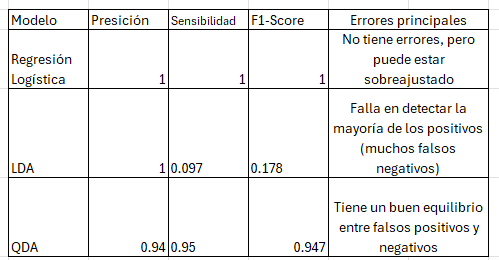

# **7.- Comparación de Modelos de Clasificación**

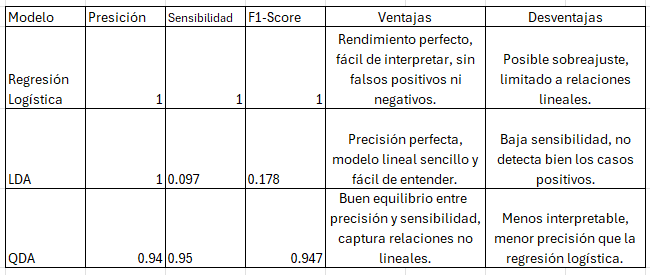

# **8.-Conclusiones**

En resumen, tras evaluar diversos modelos de clasificación (Regresión Logística, LDA y QDA), los resultados nos indican que la Regresión Logística ofrece el mejor rendimiento general en precisión, sensibilidad, F1-Score y matriz de confusión. Este modelo logró una precisión y sensibilidad perfectas (1. 0), lo que significa que clasificó correctamente todos los casos, tanto positivos como negativos, sin errores. De la misma forma, la interpretación de los coeficientes es clara, lo que facilita entender cómo cada variable afecta la probabilidad de tener más de 1000 casos activos. La regresión logística es particularmente útil cuando se requiere un modelo preciso y fácil de interpretar para clasificación binaria.

Sin embargi, aunque la regresión logística es el modelo más eficiente y fácil de interpretar, el QDA también muestra un buen rendimiento, con una precisión del 99% y una alta sensibilidad del 95%. Este modelo es apropiado cuando se busca mayor flexibilidad para modelar relaciones no lineales entre las variable; también, LDA tuvo un rendimiento aceptable en precisión, pero su baja sensibilidad lo hace menos adecuado para esta clasificación, ya que no identifica bien los casos positivos.

De tal forma que podemos concluir que, para la tarea de clasificar los casos activos de COVID-19, la Regresión Logística es la opción más recomendable por su alto rendimiento y facilidad de interpretación, aunque QDA podría considerarse si se prefieren modelos más complejos.